In [22]:
import csv
import pandas as pd
from scipy import io
import numpy as np

In [23]:
arff_file = io.arff.loadarff('phpMawTba.arff')

In [24]:
adult_census = pd.DataFrame(arff_file[0])

# convert bytes columns to strings

str_df = adult_census.select_dtypes([object])
str_df = str_df.stack().str.decode('utf-8').unstack()

for col in str_df:
    adult_census[col] = str_df[col]

In [25]:
adult_census.head()

age  workclass    fnlwgt     education  education-num      marital-status  \
0  25.0    Private  226802.0          11th            7.0       Never-married   
1  38.0    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college           10.0  Married-civ-spouse   
4  18.0          ?  103497.0  Some-college           10.0       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
1    Farming-fishing      Husband  White    Male           0.0           0.0   
2    Protective-serv      Husband  White    Male           0.0           0.0   
3  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
4                  ?    Own-child  White  Female           0.0           0.0   

   hours-per-week native-country  class  
0            40.0  United-States  <=50K  
1            50.0  United-States  <=50K  
2            40.0  United-States   >50K  
3            40.0  United-States   >50K  
4            30.0  United-States  <=50K

In [28]:
target_column = "class"
adult_census[target_column].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [30]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [32]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


In [34]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


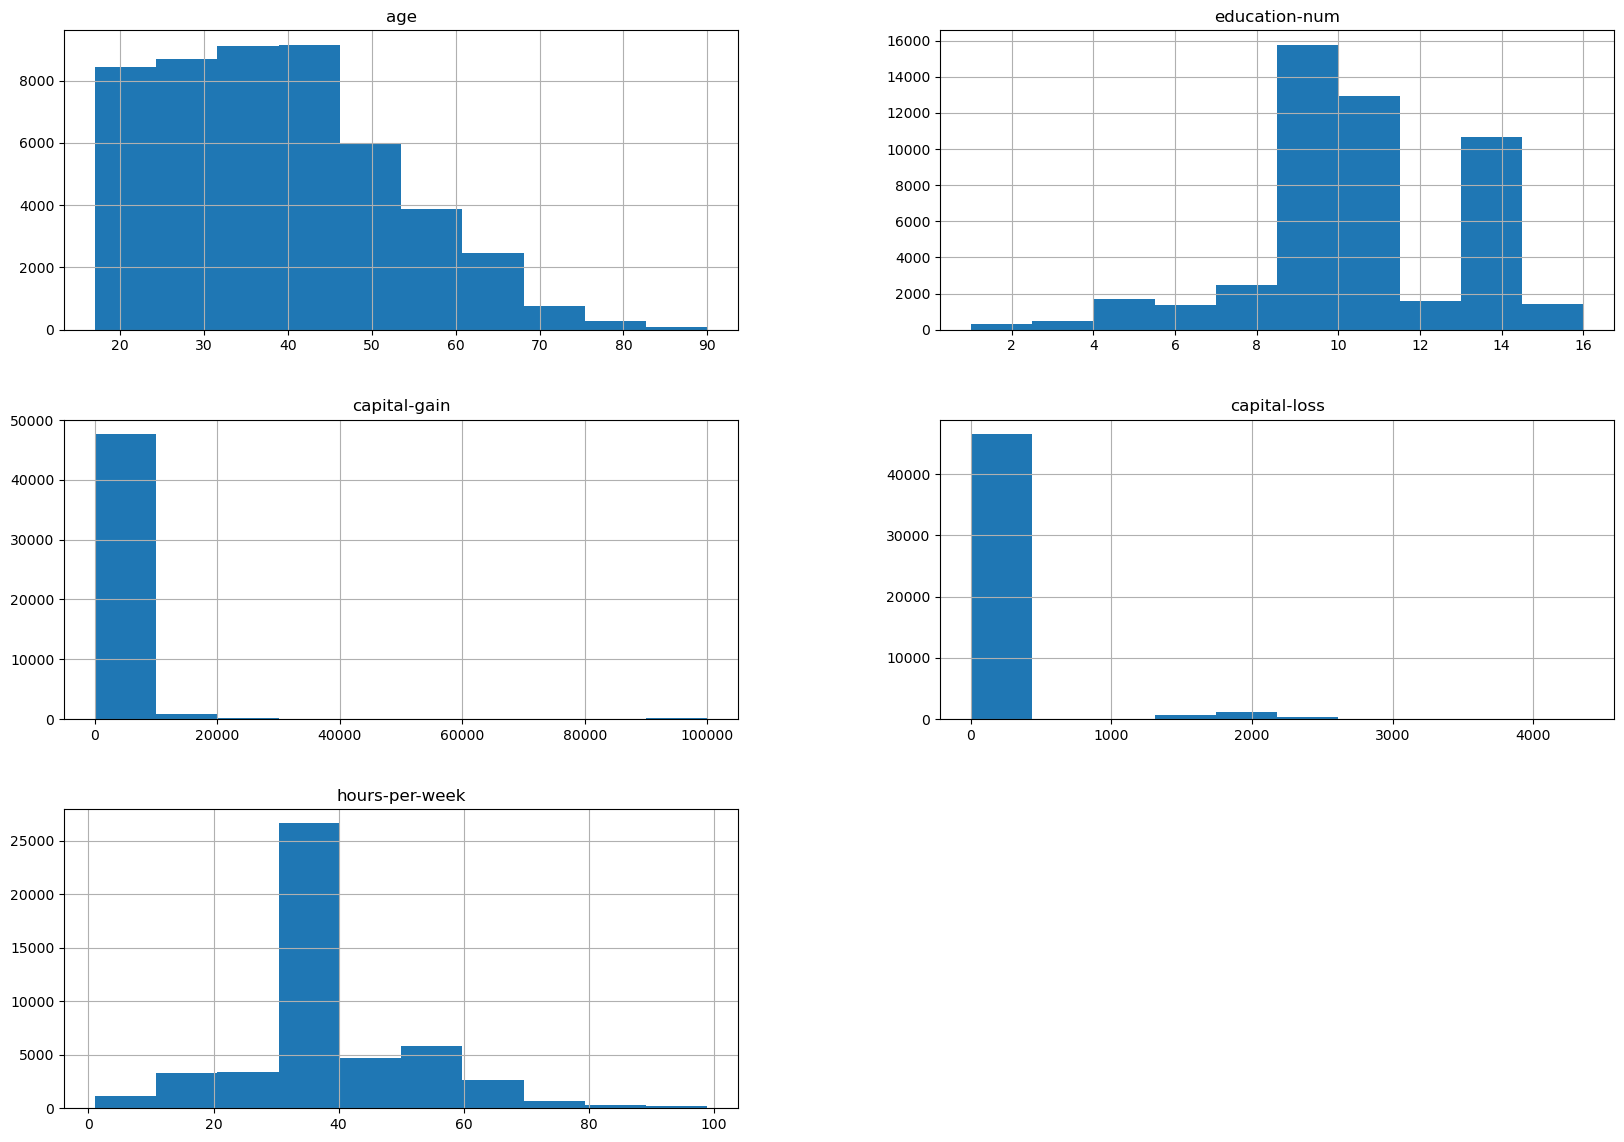

In [35]:
_ = adult_census.hist(figsize=(20,14))

In [36]:
adult_census["sex"].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [37]:
adult_census["education"].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [39]:
pd.crosstab(
    index=adult_census["education"], columns = adult_census["education-num"]
)

education-num  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0    9.0    10.0  \
education                                                                     
10th              0     0     0     0     0  1389     0     0      0      0   
11th              0     0     0     0     0     0  1812     0      0      0   
12th              0     0     0     0     0     0     0   657      0      0   
1st-4th           0   247     0     0     0     0     0     0      0      0   
5th-6th           0     0   509     0     0     0     0     0      0      0   
7th-8th           0     0     0   955     0     0     0     0      0      0   
9th               0     0     0     0   756     0     0     0      0      0   
Assoc-acdm        0     0     0     0     0     0     0     0      0      0   
Assoc-voc         0     0     0     0     0     0     0     0      0      0   
Bachelors         0     0     0     0     0     0     0     0      0      0   
Doctorate         0     0     0     0     0     0     0     0      0      0   
HS-grad           0     0     0     0     0     0     0     0  15784      0   
Masters           0     0     0     0     0     0     0     0      0      0   
Preschool        83     0     0     0     0     0     0     0      0      0   
Prof-school       0     0     0     0     0     0     0     0      0      0   
Some-college      0     0     0     0     0     0     0     0      0  10878   

education-num  11.0  12.0  13.0  14.0  15.0  16.0  
education                                          
10th              0     0     0     0     0     0  
11th              0     0     0     0     0     0  
12th              0     0     0     0     0     0  
1st-4th           0     0     0     0     0     0  
5th-6th           0     0     0     0     0     0  
7th-8th           0     0     0     0     0     0  
9th               0     0     0     0     0     0  
Assoc-acdm        0  1601     0     0     0     0  
Assoc-voc      2061     0     0     0     0     0  
Bachelors         0     0  8025     0     0     0  
Doctorate         0     0     0     0     0   594  
HS-grad           0     0     0     0     0     0  
Masters           0     0     0  2657     0     0  
Preschool         0     0     0     0     0     0  
Prof-school       0     0     0     0   834     0  
Some-college      0     0     0     0     0     0

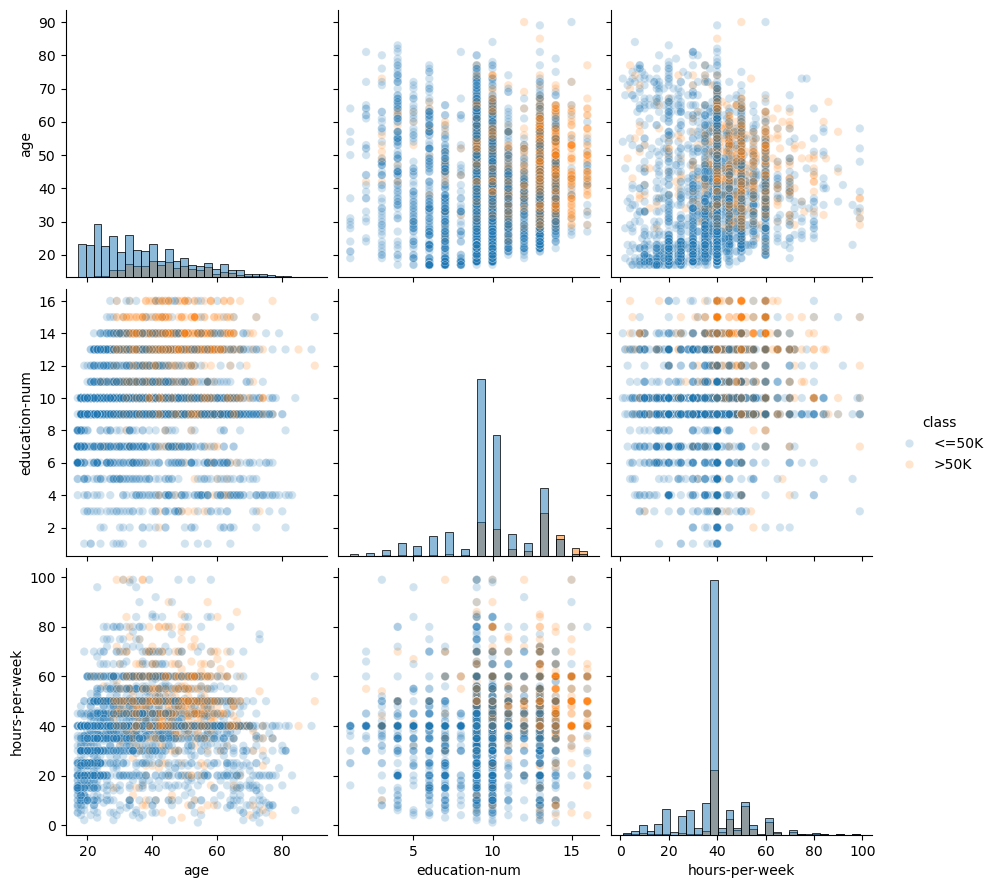

In [40]:
import seaborn as sns

# Plot a subset of the data to keep plot readable and make the plotting faster

n_samples_to_plot = 5000
columns = ["age","education-num","hours-per-week"]
_ = sns.pairplot(
    data = adult_census[:n_samples_to_plot],
    vars = columns,
    hue = target_column,
    plot_kws={"alpha": 0.2},
    height = 3,
    diag_kind = "hist",
    diag_kws = {"bins": 30},
)

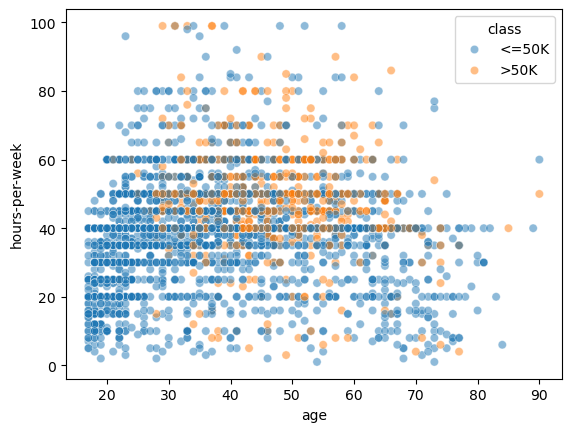

In [41]:
_ = sns.scatterplot(
    x = "age",
    y = "hours-per-week",
    data = adult_census[:n_samples_to_plot],
    hue = target_column,
    alpha = 0.5,
)

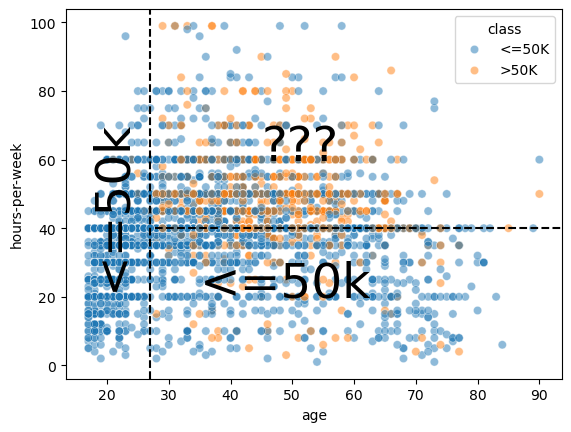

In [43]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x = "age",
    y = "hours-per-week",
    data = adult_census[:n_samples_to_plot],
    hue = target_column,
    alpha = 0.5,
)

age_limit = 27
plt.axvline(x = age_limit, ymin = 0, ymax = 1, color = "black", linestyle = "--")

hours_per_week_limit = 40
plt.axhline(
    y = hours_per_week_limit, xmin = 0.18, xmax = 1, color = "black", linestyle = "--"
)

plt.annotate("<=50k", (17, 25), rotation = 90, fontsize = 35)
plt.annotate("<=50k", (35, 20), fontsize = 35)
_ = plt.annotate("???", (45, 60), fontsize = 35)